# Practice

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
# data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
# data = np.array(df.iloc[:100, [0, 1, -1]])

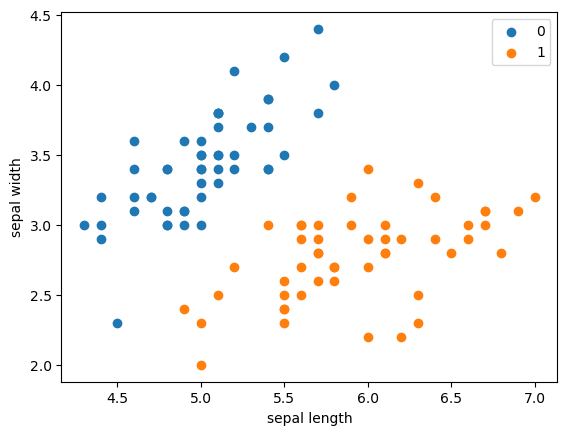

In [3]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [4]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1].reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
from knn import KNN

clf = KNN(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

In [67]:
mesh = np.meshgrid(np.linspace(4.5, 7.0, 10), np.linspace(2.0, 4.0, 10))
cart = np.array(mesh).T.reshape(-1, 2)

In [68]:
test_point = np.asarray([[4.0, 3.0]])
result = clf.predict(cart)
index_1 = (result == 1).reshape(-1)
index_0 = (result != 1).reshape(-1)

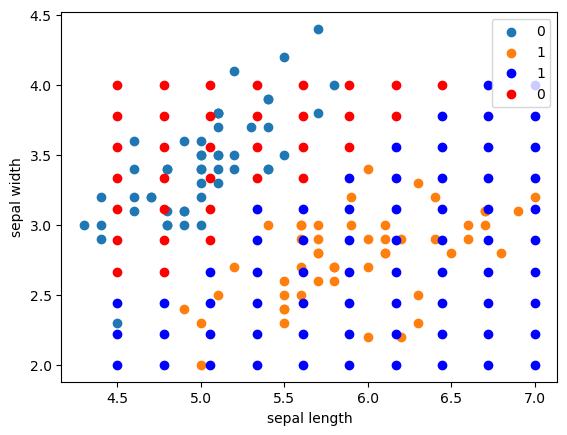

In [69]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.plot(cart[index_1, 0], cart[index_1, 1], 'bo', label='1')
plt.plot(cart[index_0, 0], cart[index_0, 1], 'ro', label='0')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

# Big data test

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100000, n_features=10, n_classes=3, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

In [ ]:
from sklearn.neighbors import KDTree
%timeit -n 1 print(KDTree(X).query(X[:1], k=3))

In [ ]:
from knn import KDTree
%timeit -n 1 print(KDTree(X, X.shape[1] - 1).query(X[:1, :-1].reshape(-1), k=3))